<a href="https://colab.research.google.com/github/Gazal4080/Gazalkhan.github.io/blob/main/Gazal_Khan_McDonald_s_Case_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [131]:
import pandas as pd
import joblib
from sklearn.cluster import KMeans
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, leaves_list
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram
import seaborn as sns

In [132]:


# 1. Load the dataset
data = pd.read_csv('mcdonalds.csv')
data.head()




,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [133]:
# 2. Preprocess the data: One-hot encode categorical features
# Identify categorical columns (you might need to adjust this based on your data)
categorical_cols = data.select_dtypes(include=['object']).columns

# Use pandas get_dummies to one-hot encode
data_encoded = pd.get_dummies(data, columns=categorical_cols)

# 3. Apply clustering
kmeans = KMeans(n_clusters=6, random_state=42, n_init=20)
kmeans.fit(data_encoded)  # Fit to the encoded data
data['Cluster'] = kmeans.fit_predict(data_encoded)  # Create and assign 'Cluster' column


In [134]:

# 5. View cluster profiles (mean values of each variable by segment)

# Select only numeric columns for calculating the mean
numeric_cols = data.select_dtypes(include=['number']).columns
cluster_profiles = data.groupby('Cluster')[numeric_cols].mean() # Calculate mean only for numeric columns

# 6. (Optional) Save model
joblib.dump(kmeans, 'mcdonalds_kmeans_model.pkl')

# Print results
print(cluster_profiles)

               Age  Cluster
Cluster                    
0        32.288538      0.0
1        57.043307      1.0
2        40.801587      2.0
3        23.162281      3.0
4        64.809735      4.0
5        49.762500      5.0


,0
Age,44.604955


,0
Age,44.604955
Cluster,2.566414


In [135]:
# Compute distances between variables (columns)
dist_matrix = pdist(cluster_profiles.T, metric='euclidean')
linkage_matrix = linkage(dist_matrix, method='ward')

# Get optimal order of variables
ordered_variables = cluster_profiles.columns[leaves_list(linkage_matrix)]
ordered_variables


Index(['Age', 'Cluster'], dtype='object')

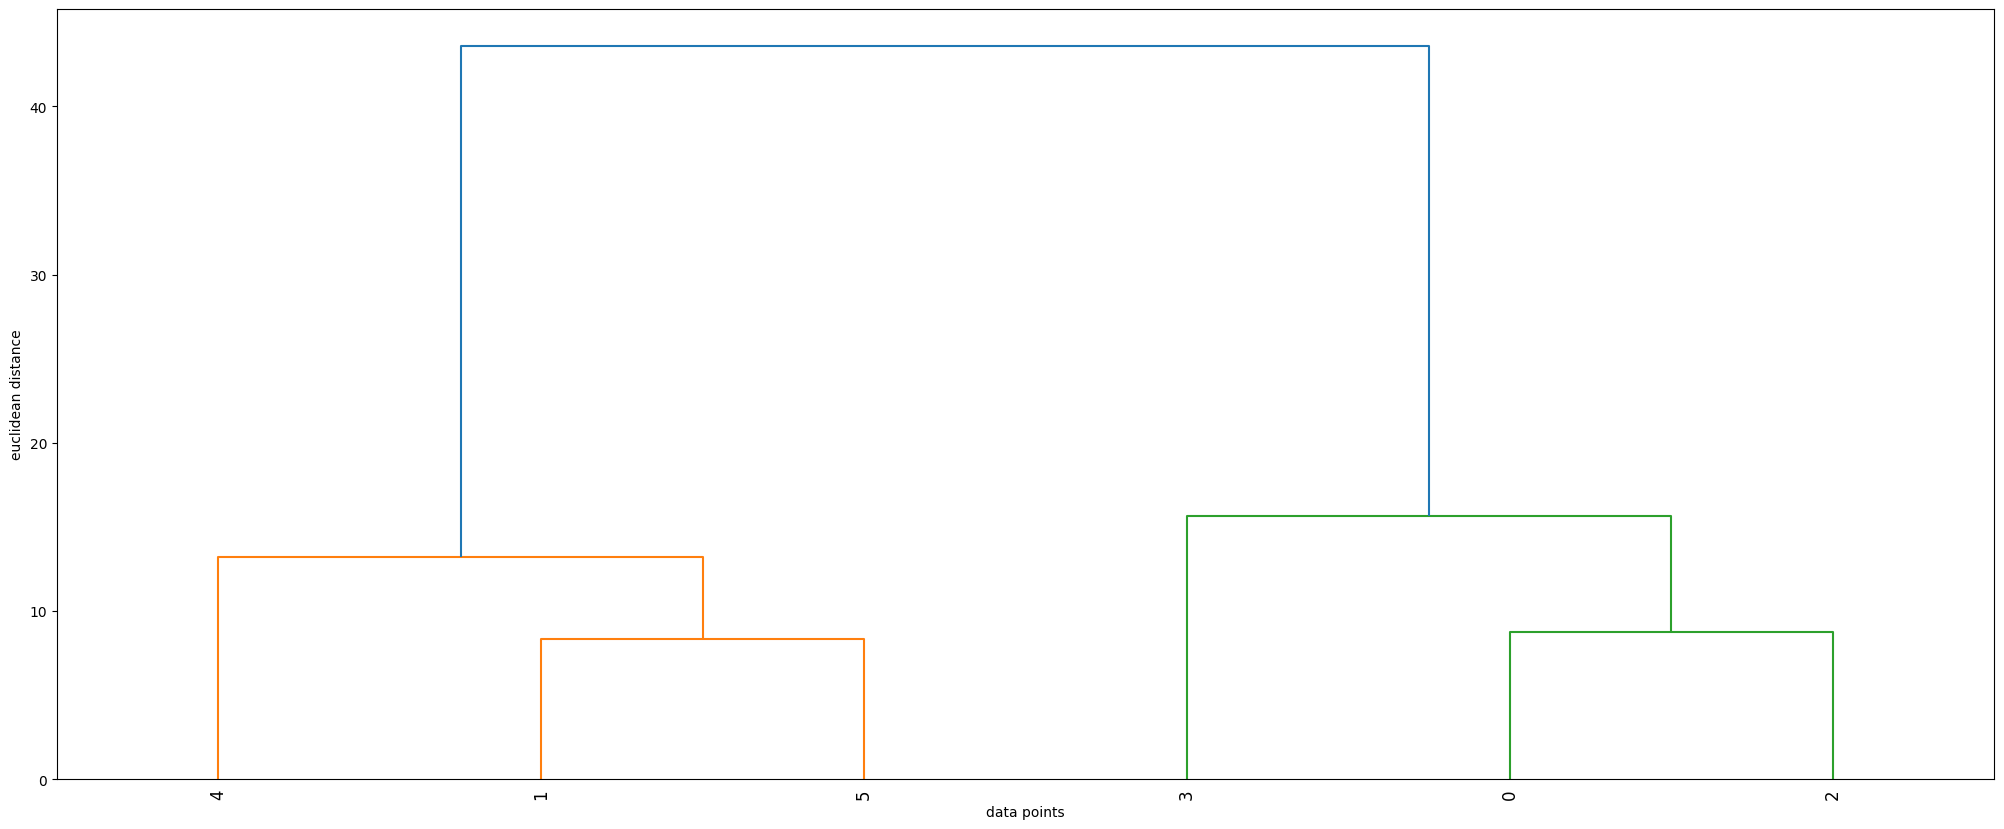

In [136]:
#create demogram and find the best clustering value
merg = linkage(cluster_profiles,method="ward")
plt.figure(figsize=(25,10))
dendrogram(merg,leaf_rotation = 90)
plt.xlabel("data points")
plt.ylabel("euclidean distance")
plt.show()

AttributeError: 'KMeans' object has no attribute 'inertia_'

In [ ]:
# Threshold for marker variables
threshold = 0.25  # as per the text

# Marker variables: where any cluster's value deviates from total mean by > 0.25
marker_mask = (cluster_profiles - overall_mean).abs() > threshold
marker_vars = marker_mask.any(axis=0)
marker_vars


,0
Age,True
Cluster,True


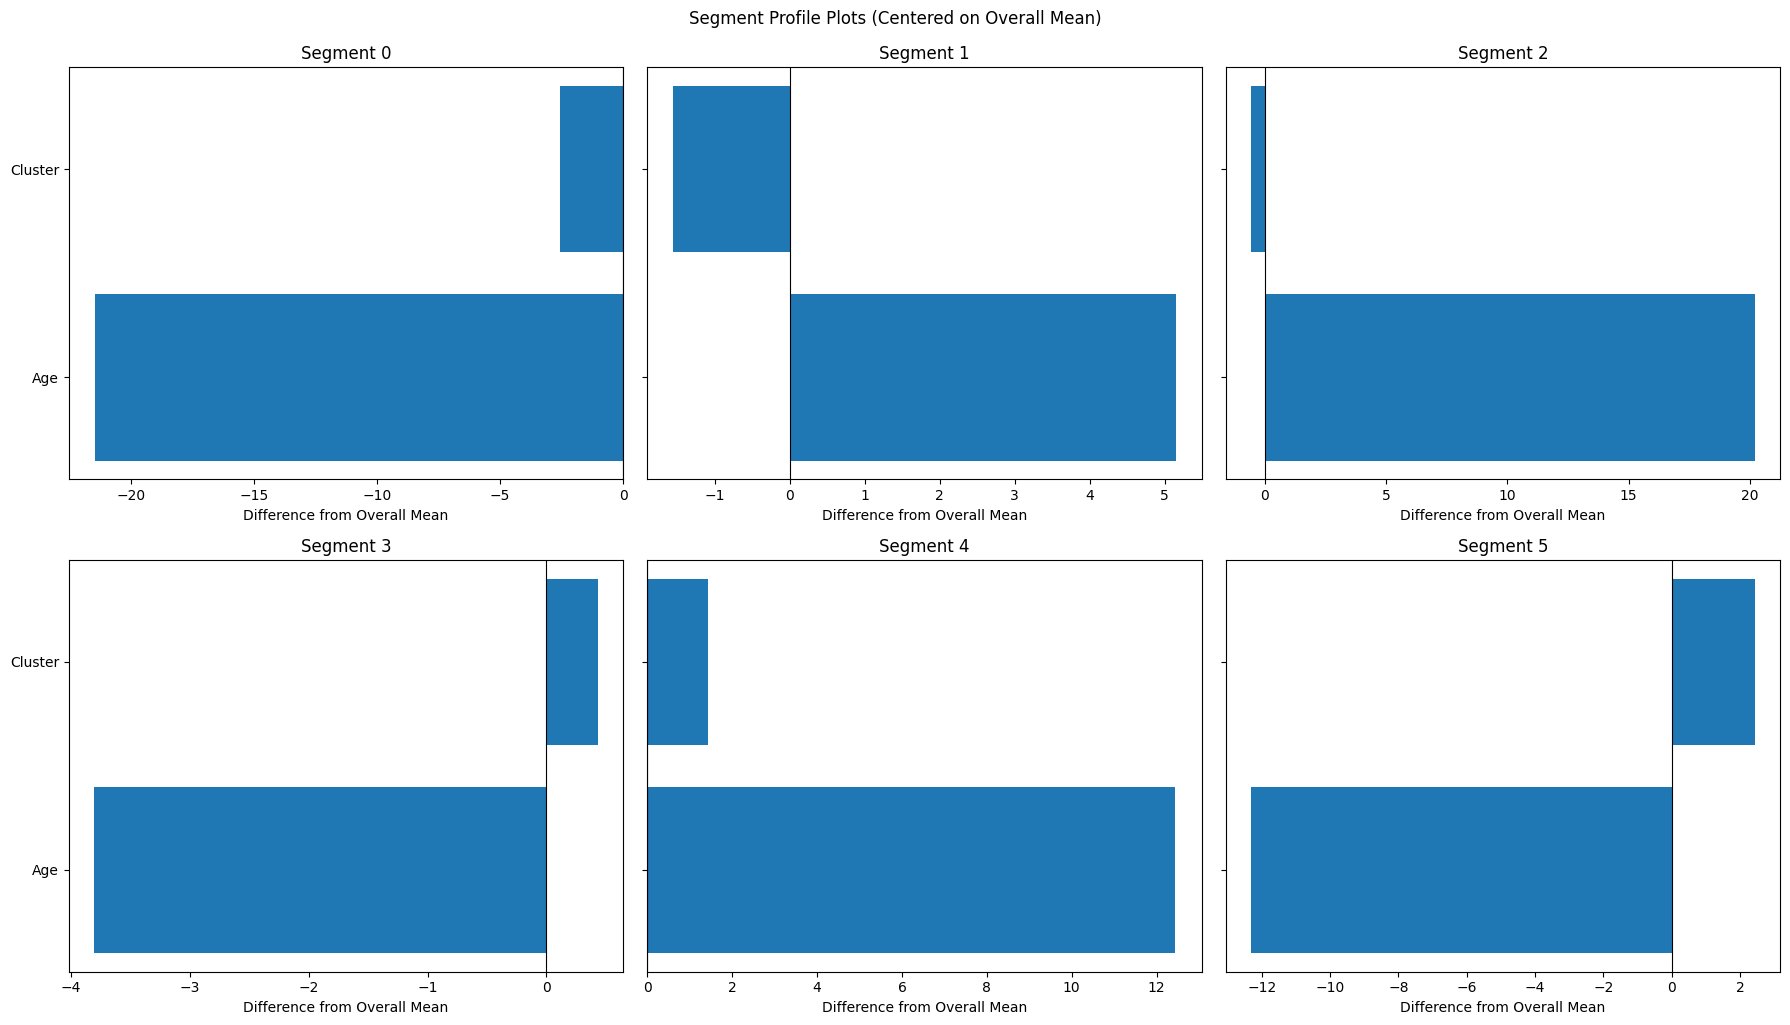

In [ ]:
# Plot profile chart (panel plot for each segment)
num_segments = cluster_profiles.shape[0]
fig, axes = plt.subplots(2, 3, figsize=(18, 10), sharey=True)
axes = axes.flatten()

for i in range(num_segments):
    ax = axes[i]
    profile = cluster_profiles.loc[i, ordered_variables]
    overall = overall_mean[ordered_variables]
    bars = profile - overall

    # Highlight marker variables
    colors = ['#1f77b4' if marker_vars[var] else '#d3d3d3' for var in ordered_variables]

    ax.barh(ordered_variables, bars, color=colors)
    ax.axvline(0, color='black', linewidth=0.8)
    ax.set_title(f'Segment {i}')
    ax.set_xlabel('Difference from Overall Mean')

plt.tight_layout()
plt.suptitle("Segment Profile Plots (Centered on Overall Mean)", y=1.02)
plt.show()
